# Introducing Scikit-image

Previously, we [have](1_colour_images_as_numpy_arrays) [explored](](0_images_as_numpy_arrays) the representation of images as NumPy arrays. [Scikit-image](https://scikit-image.org) (`skimage`) is a Python image prcoessing package which is built from NumPy and SciPy, along with some other libraries, and uses NumPy arrays as its fundamental image representations. This page will show some foundational aspects of `skimage`, focusing on its coherence with the NumPy image array concepts we saw on the last two pages.

# Images are arrays, arrays are images

As we saw earlier, the technical definition of an image is *an (at least) two-dimensional array*. We know that each element of an image array (an "array pixel") contains information about the grey-level or colour of that element. Perhaps obviously, these fundamental principles apply equally to Scikit-image, given that it represents images as NumPy arrays. The table below outlines how images are represented in `skimage` - you'll notice it is identical to the principles we have seen for representing images in NumPy: 

|||
|:---|:---|
|Image|`np.ndarray`|
|Pixels|array values e.g. `img_arr[2, 3]`|
|Image Array `dtypes` |(`np.uint8`, `np.float`, many others)|

Before exploring how `skimage` works, let's start by building some image objects to perform image manipulations on. As normal, we begin by importing some libraries:

In [1]:
# Import libraries.
import numpy as np
import matplotlib.pyplot as plt

# Set the default colourmap for this session.
plt.rcParams['image.cmap'] = 'gray'

# Import a custom function to give hints for some exercises.
from hints import hint_cat, hint_camera

# A custom function to quickly report array image attributes.
from show_attributes import show_attributes

We can use some simple NumPy functions and the familiar array indexing syntax to create an image array:

[[1. 0.]
 [0. 1.]]


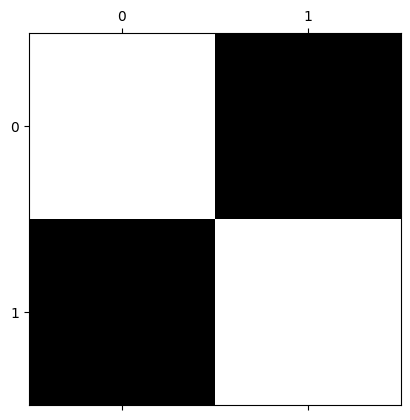

In [2]:
# Create an image array.
squares = np.array([[1, 0,], 
                    [0, 1,]], 
                   dtype=float)

# Show the array ("raw" output from NumPy)
print(squares)

# Show the array, visualised with Matplotlib
plt.matshow(squares);

You will recall that this array - in virture of being 2-D and having only one numeric value per array pixel - is a single-channel array. This means that it contains only information about pixel intensity (grey-level), and not about colour. 

To include true colour information, our array must be of at least three-dimensions. A three dimensional colour image array typically has three "slices" in the third dimension. Each element of each slice contains a number between 0 and 1 (for `float64` data), or between 1 and 255 (for `uint8` data). For the standard RGB (Red-Green-Blue) format the number in each element of each slice in the third dimension tells that array pixel what colour to be (e.g. a mix of red, green and blue, across the three slices). Hence these slices, in the third dimension, are called "colour channels". 

![](images/three_slice_algebraic_multi.png)

As we saw previously, we can control the amount of colour in the image by manipulating the each channel in the third dimension:

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (2, 2, 3)
Max Pixel Value: 1.0
Min Pixel Value: 0.0


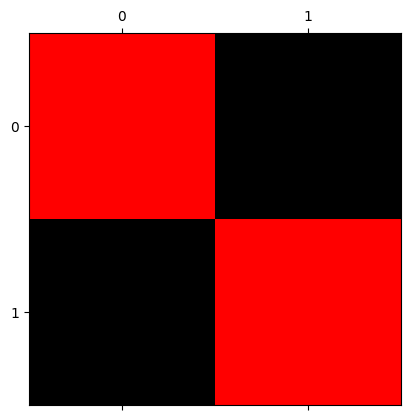

In [3]:
# Using `np.stack()` to create a multi-channel array.
red_squares = np.stack([squares, # 1's are only present in the red channel.
                        squares * 0, # The green channel is "switched off".
                        squares * 0], # The blue channel is "switched off".
                        axis=2)
show_attributes(red_squares)
plt.matshow(red_squares);

We show this principle again below, for each colour channel. The top row of the plot shows the channels for `uint8` data with 255 as the maximum intensity pixel value. The second row of the plot shows each channel for `float64` data, using 1 as the maximum pixel intensity value:

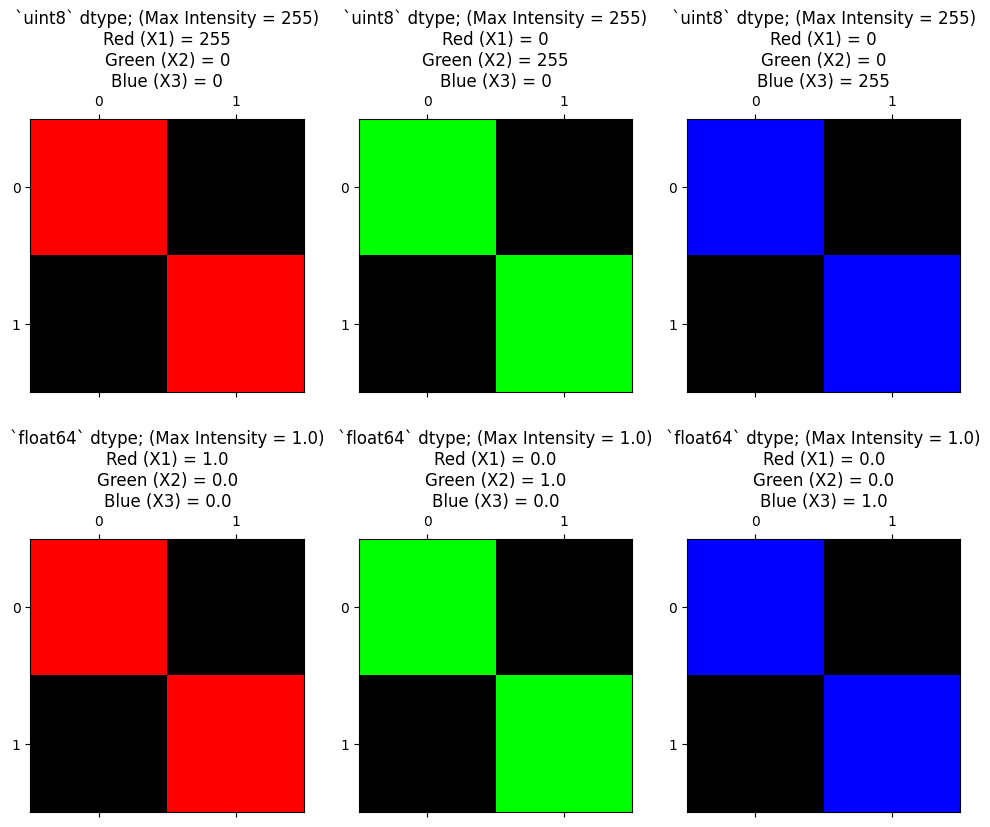

In [4]:
# Use a custom function to plot the maximum intensity values in the diagonals, for `int` and `float` data,
# using our familiar 1's and 0's array.
from random_colours import plot_int_float
plot_int_float();

These are the basic aspects of images represented as NumPy arrays. Other ways of representing colour exist and are supported by `skimage`, and indeed, not all 3-D image arrays contain colour information (e.g. structural brain images). We will look at these concepts in later sections, but `skimage` can work with these images as easily as the basic coloured sqaures we have just made - all these images *are just NumPy arrays* and can be handled just as any NumPy array.  

# Going `ski`-ing : arrays as arguments

So far so good, we have an image array to experiment with. Let's import `skimage` itself. The convention for importing `skimage` (e.g. what you will see in other peoples' code) is to name the import `ski`:

In [5]:
# Import statement and the conventional shorthand.
import skimage as ski

Remember our [maxim](0_images_as_numpy_arrays.Rmd.) that "image-processing involves operations which change the values inside the image array and therefore change the corresponding visual image"? Because Scikit-image represents images as NumPy arrays, *the majority of Scikit-image functions take NumPy `ndarray`s as arguments.* 

For instance, the `rgb2gray()` function from the `ski.color` module can take a multi-channel array, and convert it to a single channel, greyscale image. We will show this with the `red_squares` array from above:

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (2, 2, 3)
Max Pixel Value: 1.0
Min Pixel Value: 0.0


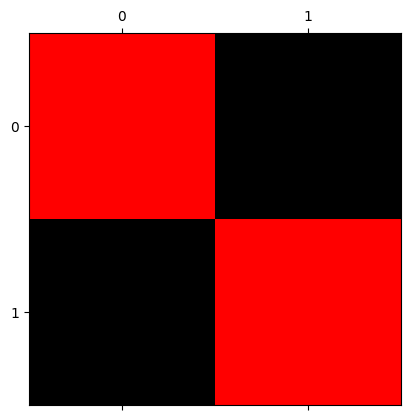

In [6]:
# Show the original `red_squares` array
show_attributes(red_squares)
plt.matshow(red_squares);

Now, we just pass the `squares` array to `ski.color.rgb2gray()` as an argument:

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (2, 2)
Max Pixel Value: 0.21
Min Pixel Value: 0.0


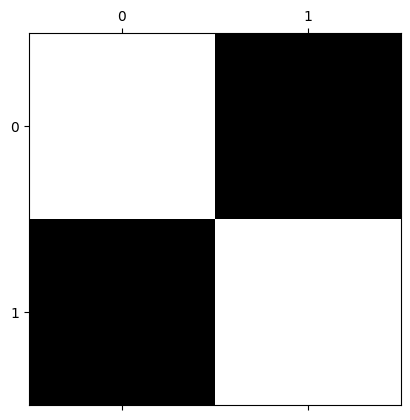

In [7]:
# Convert the `red_squares` array to greyscale.
back_to_black = ski.color.rgb2gray(red_squares)
show_attributes(back_to_black)
plt.matshow(back_to_black);

Most Scikit-image functions work like  this - they take a NumPy array as input, do something to the array pixel values, then return an altered image array. As we mentioned above, under the hood `skimage` is often using NumPy and SciPy functions to do the image manipulation, something we will explore in more detail on the [next page](3_skimage_processing_from_numpy_and_scipy). 

You may ask why the maximum pixel values are now 0.21, rather than 1? This is because of the [formula](https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color) that `rgb2gray()` uses to do the conversion; we will also show this in detail in the *Colourspaces* section later in this page.

# Scikit-image ships with built-in images

Conveniently, `skimage` ships with image arrays included. It should come as no surprise that these are also NumPy arrays. We can access all of the built-in images through the `ski.data` module. Here we use `dir()` to show all of the available options:

In [8]:
dir(ski.data)

['astronaut',
 'binary_blobs',
 'brain',
 'brick',
 'camera',
 'cat',
 'cell',
 'cells3d',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'colorwheel',
 'data_dir',
 'download_all',
 'eagle',
 'file_hash',
 'grass',
 'gravel',
 'horse',
 'hubble_deep_field',
 'human_mitosis',
 'immunohistochemistry',
 'kidney',
 'lbp_frontal_face_cascade_filename',
 'lfw_subset',
 'lily',
 'logo',
 'microaneurysms',
 'moon',
 'nickel_solidification',
 'page',
 'palisades_of_vogt',
 'protein_transport',
 'retina',
 'rocket',
 'shepp_logan_phantom',
 'skin',
 'stereo_motorcycle',
 'text',
 'vortex']

Here we will load the `coffee` image from `ski.data`:

In [9]:
# Load in the image.
coffee = ski.data.coffee()

# Show the image array.
coffee

array([[[ 21,  13,   8],
        [ 21,  13,   9],
        [ 20,  11,   8],
        ...,
        [228, 182, 138],
        [231, 185, 142],
        [228, 184, 140]],

       [[ 21,  13,   7],
        [ 21,  13,   9],
        [ 20,  14,   7],
        ...,
        [228, 182, 136],
        [231, 185, 139],
        [229, 183, 137]],

       [[ 21,  14,   7],
        [ 23,  13,  10],
        [ 20,  14,   9],
        ...,
        [228, 182, 136],
        [228, 184, 137],
        [229, 185, 138]],

       ...,

       [[189, 124,  77],
        [214, 155, 109],
        [197, 141, 100],
        ...,
        [165,  86,  37],
        [161,  82,  41],
        [143,  67,  29]],

       [[207, 148, 102],
        [201, 142,  99],
        [196, 140,  97],
        ...,
        [154,  74,  37],
        [147,  66,  33],
        [145,  65,  31]],

       [[197, 141, 100],
        [195, 137,  99],
        [193, 138,  98],
        ...,
        [158,  73,  38],
        [144,  64,  30],
        [143,  60,  29]]

In [10]:
# Inspect the attributes of the image.
show_attributes(coffee)

Type: <class 'numpy.ndarray'>
dtype: uint8
Shape: (400, 600, 3)
Max Pixel Value: 255
Min Pixel Value: 0


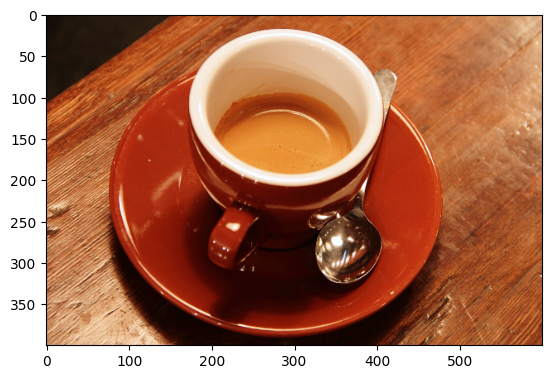

In [11]:
# Show the image with Matplotlib.
plt.imshow(coffee);

Because these images are nothing but NumPy arrays, we can use all the standard array slicing to interact with them. For instance, we can easily use slicing to ruin the `coffee` image by placing a huge green square over it:

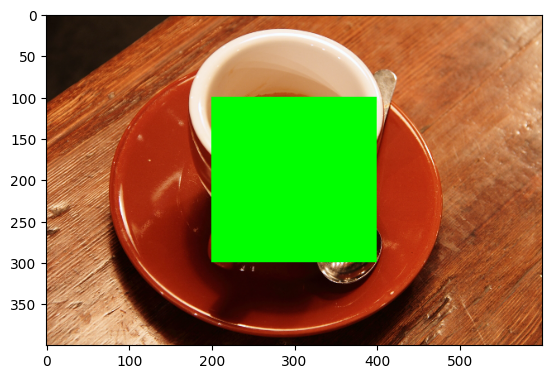

In [12]:
ruined_coffee = coffee.copy()
ruined_coffee[100:300, 200:400, :] = [0, 255, 0]  # [Red channel, Green channel, Blue channel]
plt.imshow(ruined_coffee);

When we explore different image processing operations, using smaller arrays often makes it easier to understand what a given processing operation is doing to individual pixels. However, in larger, more complex arrays, it is often easier to appreciate the "global" effect of an image processing operation on the perceived visual image. As such, we will use a variety of simple arrays (like `squares`) and a variety of more complex images from `skimage.data` to show the effect of different `skimage` manipulations, as well as their constituent `numpy` and `scipy` operations.

# Input/output and `dtype`s in `skimage`

Before manipulating and prcoessing images, we will need to load them into memory. After we are finished with our high concept digital art, we will want to save our creations. To help us with this, input and output (e.g. loading and saving image files) is handled by the `skimage.io` module. 

We have already met this module on [earlier pages](0_images_as_numpy_arrays.Rmd) but we will discuss some of its finer details here. `skimage` supports multiple image `dtypes` (e.g. the types of numbers within the image array), and loading and saving files often requires close attention to, or even conversion of, the image `dtype`, as we will see shortly.

For npw, let's use `ski.io.imread()` to load a `.png` of the terrifying smile we hand-crafted in the earlier tutorials:

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


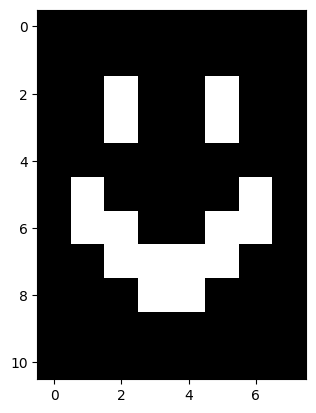

In [13]:
# Read in an image file.
smiley_from_file = ski.io.imread("images/smiley.png",
                                 as_gray=True) # Ensure dimensions match the original.

# Show the "raw" NumPy output
print(smiley_from_file)

# Show the array (graphically).
plt.imshow(smiley_from_file);

In [14]:
# Show the attributes of the image.
show_attributes(smiley_from_file)

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (11, 8)
Max Pixel Value: 1.0
Min Pixel Value: 0.0


No less terrifying than when we first saw it...

Because NumPy arrays are the foundational image representations used by `skimage`, `ski.io.imread()` loads image files as NumPy arrays by default. This is not the case with some other python image libraries (like `Image`) which have their own native image representations.

Now, a lot of `skimage` functions serve specific purposes - like improving the quality or clarity of an image. Others are just there to look cool. The `ski.transform.swirl()` function falls into the latter category. According to the [documentation](https://scikit-image.org/docs/0.25.x/auto_examples/transform/plot_swirl.html), this function performs a non-linear deformation creating a whirlpool effect. Because `skimage` has loaded `smiley.png` as a NumPy array, we can pass the image straight to the `swirl` function:

[[0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.00338509 0.03785073
  0.         0.        ]
 [0.         0.14817294 0.75800676 0.         0.20296116 0.84274916
  0.         0.        ]
 [0.         0.22793052 0.68880311 0.         0.26538503 0.66049489
  0.         0.        ]
 [0.         0.06692754 0.09253997 0.         0.         0.06692754
  0.19601409 0.01223244]
 [0.08225702 0.47564046 0.         0.         0.12032263 0.50828468
  0.91365098 0.0458475 ]
 [0.01976743 0.97398067 0.47110121 0.         0.46717838 0.97044561
  0.66297409 0.00484172]
 [0.02687155 0.34989506 0.83183389 0.93827959 1.         0.71320245
  0.08225702 0.        ]
 [0.         0.         0.14820102 0.55782448 0.84161038 0.20920003
  0.         0.        ]
 [0.         0.         0.         0.01297095 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


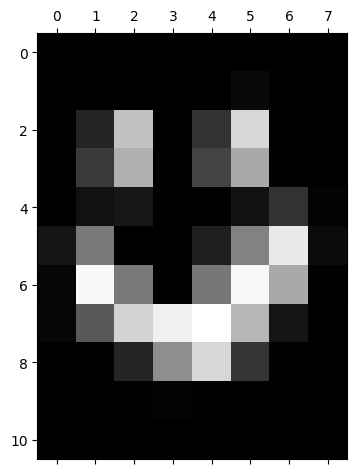

In [15]:
#  Swirl the `smiley_from_file` array.
smiley_swirled = ski.transform.swirl(smiley_from_file,
                                     center=(3, 6), # Set the central pixel coordinate.
                                     radius=10)  # Set the extent of the `swirl` 
                                                 # (in number of pixels)
# Show the "raw" NumPy output.
print(smiley_swirled)

# Show the swirled array (graphically).
plt.matshow(smiley_swirled);

`smiley` only gets more terrifying with each manipulation, it seems...What `swirl` has done here is, well, swirled the pixels around a central point, resulting in this crooked, wonky smile.

Now, if we want to save our terrifying creation, we can use `ski.io.imsave()` to save images...

In [16]:
# OUCH!
ski.io.imsave("images/smiley_swirled.png", # Path to save image to.
              smiley_swirled)              # Image array to save.

OSError: cannot write mode F as PNG

Oh dear, what a horrible looking error for such a simple request. What has happened here? The error message is cryptic...

`OSError: cannot write mode F as PNG`

...but it means that there is an issue with the `dtype` of the array we are trying to save:

In [17]:
smiley_swirled.dtype

dtype('float64')

As we have already seen, `skimage` [supports the following `dtypes`](https://scikit-image.org/docs/0.25.x/user_guide/data_types.html):

![](images/dtypes_skimage.png)

The error above occurred because we are trying to save our image to the `.png` format, which does not support the `float64` `dtype`. Issues like these are common, and as such `skimage` has a variety of functions to address them.

In this case, we can convert our image array from `float64` to `uint8` using the `ski.util.img_as_ubyte()` function:

In [18]:
smiley_swirled = ski.util.img_as_ubyte(smiley_swirled)

smiley_swirled.dtype

dtype('uint8')

This format *is* supported for `.png` files, and we can painlessly save our image using `ski.io.imsave()`:

In [19]:
# Saving our image (successfully).
ski.io.imsave("images/smiley_swirled.png", # Path to save image to.
              smiley_swirled)              # Image array to save.

We can now use `ski.io.imread()` to read the file we just saved, back into this notebook:

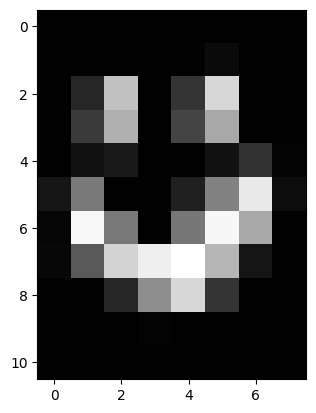

In [20]:
# Load the file back in.
load_back_in = ski.io.imread("images/smiley_swirled.png")

# Show the file.
plt.imshow(load_back_in);

We can see that the `dtype` of the freshly save, freshly loaded image is indeed `uint8`:

In [21]:
show_attributes(load_back_in)

Type: <class 'numpy.ndarray'>
dtype: uint8
Shape: (11, 8)
Max Pixel Value: 255
Min Pixel Value: 0


Another option here, is just to save to another image format, like `.jpg`. Below we save the original `smiley_swirled` array as a `.jpg` file, avoiding the ugly error message:

In [22]:
# Save as `.jpg`.
ski.io.imsave("images/smiley_swirled.jpg", # Path to save image to.
              smiley_swirled)              # Image array to save.

Issues with `dtype` can be a source of errors, so it is important to be aware of what `dtype` your image arrays are using. Fortunately, as we have seen, to help remedy or avoid such errors, `skimage` makes it easy to convert between `dtypes`, where such errors do occur.

# Small image arrays, big image arrays
Before we move on, a note on `swirl` - we said earlier that it is easier to understand a manipulation at the array pixel-level using a small (low-resolution) array, but easier to appreciate its global effect on a larger (high-resolution) image array. We saw the effect of `swirl` on `smiley_swirled`, but the nature of the visual effect can be seen more clearly when we apply it to `coffee`:

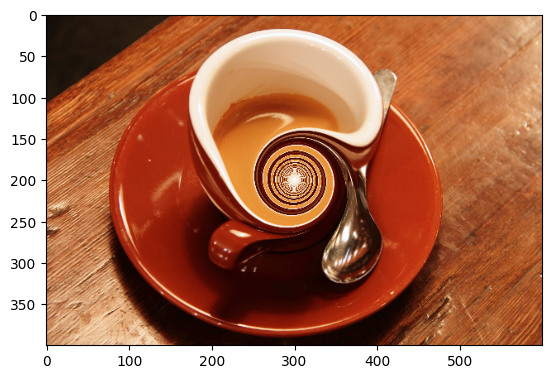

In [23]:
# `swirl` the coffee image
plt.imshow(ski.transform.swirl(coffee, 
                    strength=100));

Pretty trippy...

::: {exercise-start}
:label: noisy-camera
:class: dropdown
:::

Now investigate the use of `ski.util.random_noise()` to add extra noise to an image. Remember that in the context of image processing, noise is *randomness*. Here is the original `camera` image from `ski.data`:

![](images/camera_plot.png)


Try to recreate something like the image below, by adding noise to the image with `ski.util.random_noise()`. Like most `skimage` functions, `random_noise()` takes a NumPy image array as an argument, and adds random quantities to the array pixel values. You will need to adjust an optional argument, see if you can work out which argument it is by reading the [documentation](https://scikit-image.org/docs/0.25.x/api/skimage.util.html#skimage.util.random_noise).

![](images/noisy_camera.png)

Make sure you pay attention to the *colour* of the noise...

Your new image should have the following attributes:

```
Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (512, 512, 3)
Max Pixel Value: 1.0
Min Pixel Value: 0.0
```

In [24]:
# YOUR CODE HERE

::: {exercise-end}
:::

::: {solution-start} noisy-camera
:class: dropdown
:::

The solution here is to `np.stack()` the `camera` image, to introduce colour channels. We then pass our 3-D arrau to `ski.util.random_noise()`, manipulating the `var` argument to control the "level" of the noise. Specifically, `var` will control the range of the changes (e.g. higher `var` means bigger absolute random values can potentially be added/subtracted from each pixel:

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (512, 512, 3)
Max Pixel Value: 1.0
Min Pixel Value: 0.0


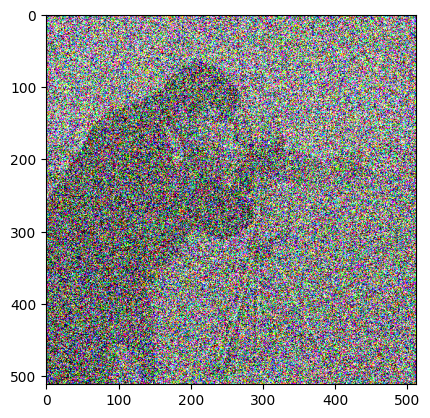

In [25]:
# Solution.
camera = ski.data.camera()

# Stack to 3-D.
camera_3d = np.stack([camera, 
                      camera,
                      camera], 
                      axis=2)

# Add noisy to every colour channel.
camera_with_noise = ski.util.random_noise(camera_3d,
                                          var=3)
# Show the result.
plt.imshow(camera_with_noise)
show_attributes(camera_with_noise);

::: {solution-end}
:::

# Colourspaces

So far we have looked at monochrome, single-channel image arrays and three-channel RBG colour image arrays. We can use the `shape` conventions from NumPy to think about these image types. Single channel images have a `shape` of `(n, m)` where `n` is the number of rows and `m` is the number of columns. RGB images have a shape of `(n, m, 3)`, so `n` rows, `m` columns and `3` slices (the colour channels).

RGB is the default, but colour images of shape `(n, m, 3)` can use different representations of colour to the RGB method we have seen. We call these different colour representation formats *colourspaces*. `skimage` supports many of them, and contains many functions for converting image arrays between colourspaces. These functions are contained in the `ski.color` module:

In [26]:
# Show the functions in `ski.color`.
dir(ski.color)

['ahx_from_rgb',
 'bex_from_rgb',
 'bpx_from_rgb',
 'bro_from_rgb',
 'color_dict',
 'combine_stains',
 'convert_colorspace',
 'deltaE_cie76',
 'deltaE_ciede2000',
 'deltaE_ciede94',
 'deltaE_cmc',
 'fgx_from_rgb',
 'gdx_from_rgb',
 'gray2rgb',
 'gray2rgba',
 'hax_from_rgb',
 'hdx_from_rgb',
 'hed2rgb',
 'hed_from_rgb',
 'hpx_from_rgb',
 'hsv2rgb',
 'lab2lch',
 'lab2rgb',
 'lab2xyz',
 'label2rgb',
 'lch2lab',
 'luv2rgb',
 'luv2xyz',
 'rbd_from_rgb',
 'rgb2gray',
 'rgb2hed',
 'rgb2hsv',
 'rgb2lab',
 'rgb2luv',
 'rgb2rgbcie',
 'rgb2xyz',
 'rgb2ycbcr',
 'rgb2ydbdr',
 'rgb2yiq',
 'rgb2ypbpr',
 'rgb2yuv',
 'rgb_from_ahx',
 'rgb_from_bex',
 'rgb_from_bpx',
 'rgb_from_bro',
 'rgb_from_fgx',
 'rgb_from_gdx',
 'rgb_from_hax',
 'rgb_from_hdx',
 'rgb_from_hed',
 'rgb_from_hpx',
 'rgb_from_rbd',
 'rgba2rgb',
 'rgbcie2rgb',
 'separate_stains',
 'xyz2lab',
 'xyz2luv',
 'xyz2rgb',
 'xyz_tristimulus_values',
 'ycbcr2rgb',
 'ydbdr2rgb',
 'yiq2rgb',
 'ypbpr2rgb',
 'yuv2rgb']

Let's load in the `cat` image from `ski.data`, to look at a different colourspace:

Type: <class 'numpy.ndarray'>
dtype: uint8
Shape: (300, 451, 3)
Max Pixel Value: 231
Min Pixel Value: 0


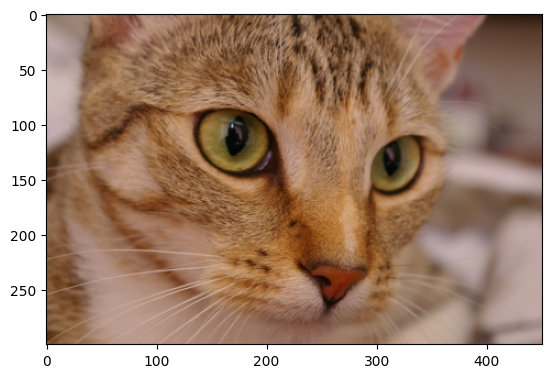

In [27]:
cat = ski.data.cat()
show_attributes(cat)
plt.imshow(cat);

On the [previous page](1_colour_images_as_numpy_arrays) we manually converted colour images to greyscale, using NumPy operations. As we saw earlier on this page, functions from the `ski.color` module, like `ski.color.rgb2gray()`, can do this more elegantly, with less code:

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (300, 451)
Max Pixel Value: 0.76
Min Pixel Value: 0.02


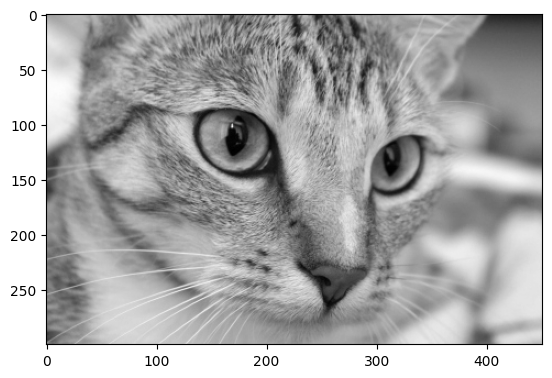

In [28]:
# From RGB to greyscale.
grey_cat = ski.color.rgb2gray(cat)
show_attributes(grey_cat)
plt.imshow(grey_cat);

This greyscale conversion is achieved by calculating the luminance of the image via a weighted average of the information in each colour channel:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

This has the effect of removing the colour channels, via a weighted summation, so the output array is 2-D. Why do we use these specific numbers? You could go and knock the door of your physicist friend to ask (don't worry, they'll be in...), or you can see [this page](https://stackoverflow.com/questions/596216/formula-to-determine-perceived-brightness-of-rgb-color) for a detailed explanation of where the weights come from.

::: {exercise-start}
:label: no-colour-cat
:class: dropdown
:::

Re-colour the `cat` image using the luminance formula provided above. Your output image should have the following attributes:

```
Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (300, 451)
Max Pixel Value: 1.0
Min Pixel Value: 0.0
```

*Hint:* you may want to investigate `ski.exposure.rescale_intensity()` to help ensure that you match the attributes of the target image...

The `cat` image array is copied for you in the cell below:

In [29]:
# YOUR CODE HERE
cat_for_exercise = cat.copy()

::: {exercise-end}
:::

::: {solution-start} no-colour-cat
:class: dropdown
:::

This is a very simple operation! We can just "plug" each colour channel of the `cat` array into the formula, using NumPy array indexing:

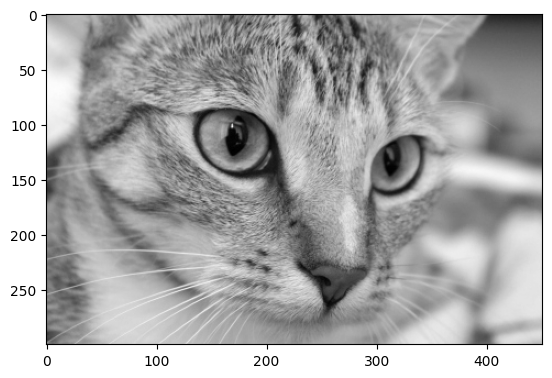

In [30]:
# Apply the formula.        Red channel.           Blue channel.          Green channel.
cat_manual_grey = 0.2126 * cat[:, :, 0] + 0.7152 * cat[:, :, 1] + 0.0722 * cat[:, :, 2]
plt.imshow(cat_manual_grey);

However, this leaves our image with an illegal pixel intensity range, given the `dtype`:

In [31]:
show_attributes(cat_manual_grey)

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (300, 451)
Max Pixel Value: 192.68
Min Pixel Value: 3.86


`float64` images, to avoid errors, should have a pixel intensity range betwee 0 and 1 (or -1 to 1, but we digress). Matplotlib knows how to render this image, but the values themselves are technically illegal, and would likely cause errors with subsequent processing operations. We can use `ski.exposure.rescale_intensity()` to ensure our image adheres to the `skimage` conventions:

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (300, 451)
Max Pixel Value: 1.0
Min Pixel Value: 0.0


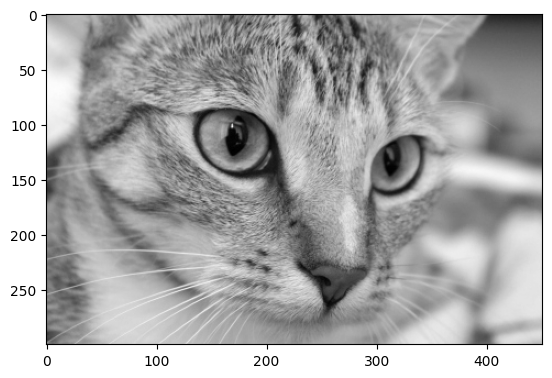

In [32]:
# Ensure the correct pixel intensity range.
cat_manual_grey = ski.exposure.rescale_intensity(cat_manual_grey,
                                                 out_range=(0, 1)) # Set the desired pixel intensity range.

# Show the result.
show_attributes(cat_manual_grey)
plt.imshow(cat_manual_grey);

::: {solution-end}
:::

We can also convert an image into a different true colourspace (e.g. not greyscale). `ski.color.rgb2hsv()` will convert an RGB image to an image in the HSV colourspace. HSV stands for [Hue, Saturation, Value](https://en.wikipedia.org/wiki/HSL_and_HSV):

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (300, 451, 3)
Max Pixel Value: 1.0
Min Pixel Value: 0.0


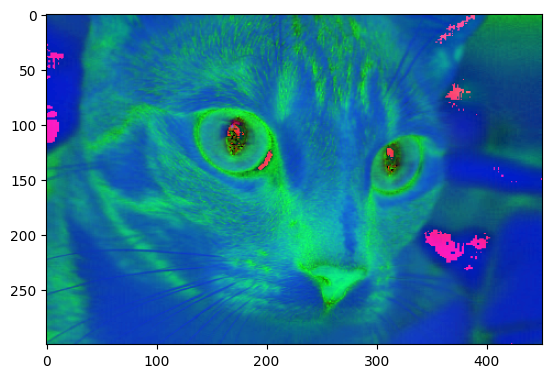

In [33]:
# Convert `cat` to the HSV colourspcae
hsv_cat = ski.color.rgb2hsv(cat)
show_attributes(hsv_cat)
plt.imshow(hsv_cat);

Psychedelic! Let's extract the channels with some array indexing operations. Each channel is 2-D, and therefore will render as a greyscale image when displayed with Matplotlib:

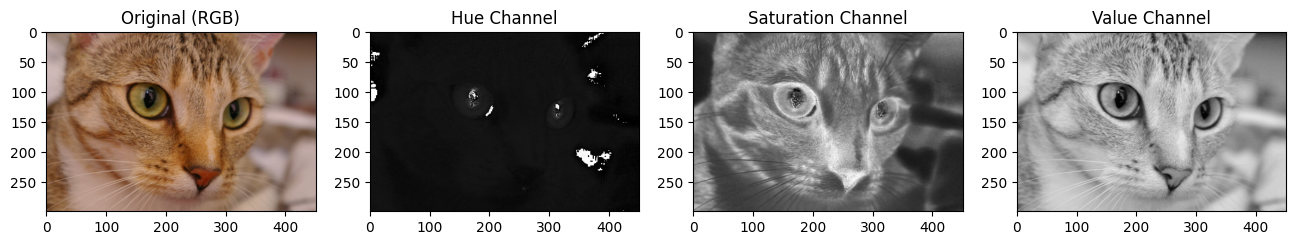

In [34]:
# Extract the HSV channels.
hue_slice = hsv_cat[:, :, 0]
saturation_slice = hsv_cat[:, :, 1]
value_slice = hsv_cat[:, :, 2]

# Plot them for comparison.
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(cat)
plt.title('Original (RGB)')
plt.subplot(1, 4, 2)
plt.imshow(hue_slice)
plt.title('Hue Channel')
plt.subplot(1, 4, 3)
plt.imshow(saturation_slice)
plt.title('Saturation Channel')
plt.subplot(1, 4, 4)
plt.imshow(value_slice)
plt.title('Value Channel');

# Colourspaces 2: transparency in the 3rd dimension

Now, other colourspaces involve arrays of different array `shape`s. For instance, some image arrays are `(n, m, 4)` in `shape` - so that's `n` rows, `m` columns and `4` slices in the third dimension.

Let's see what that extra slice does, using our tried and true `squares` image array:

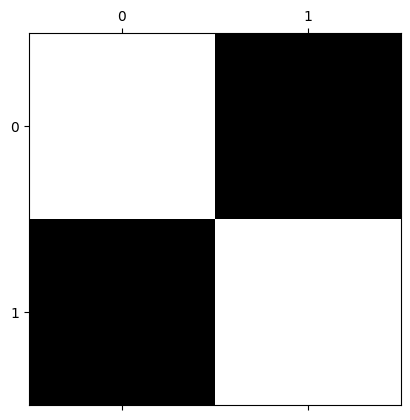

In [35]:
plt.matshow(squares);

Let's `np.stack()` this image array into 4-D, and set only the 1st and 4th channels to have nonzero values (e.g. so all values in the green and blue channel are 0's):

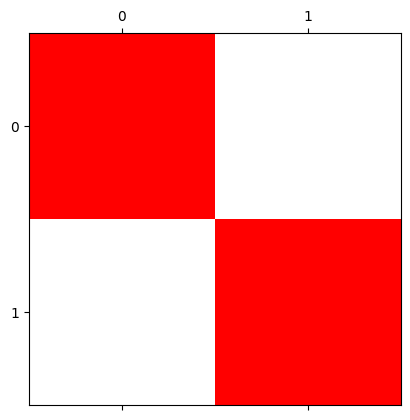

In [36]:
# Create an array with 4 channels (e.g. 4 slices in the third dimension).
four_channel_stack = np.stack([squares, 
                               squares * 0, # All 0's in the green channel.
                               squares * 0, # All 0's in the blue channel.
                               squares], # Add a fourth slice in the third dimension.
                               axis=2)

plt.matshow(four_channel_stack);

Ok, so we just get red nonzero pixels. So what does the 4th channel do?

It controls *transparency*. Setting it to 1 gives maximum *opacity* e.g. solid, non-see through colour.

Let's set it lower:

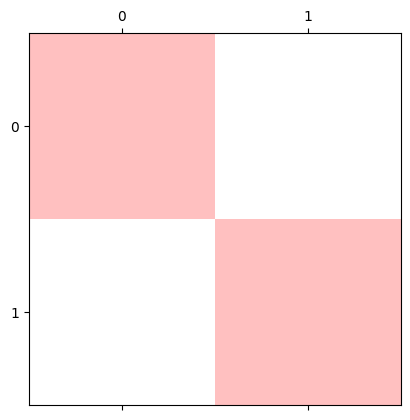

In [37]:
four_channel_stack = np.stack([squares, 
                               squares * 0,
                               squares * 0,
                               squares * 0.25], # Set the nonzero values on the 4th slice in the                                                  
                               axis=2)      # to equal 25.

plt.matshow(four_channel_stack);

This new transparency channel is called an *alpha channel*. Let's add one to our `cat` image. We'll duplicate the first slice of the third dimension, as the fourth slice:

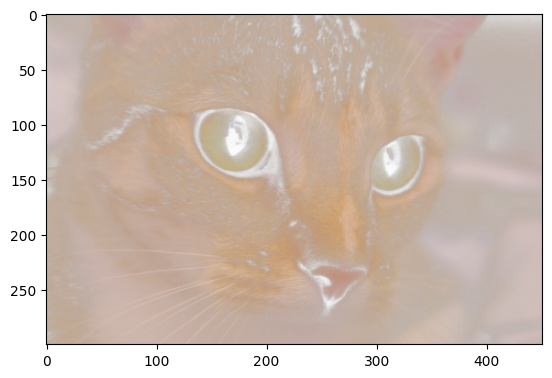

In [38]:
four_channel_stack_cat = np.stack([cat[:, :, 0],
                                   cat[:, :, 1],
                                   cat[:, :, 2],
                                   cat[:, :, 0]], # Duplicate the first slice as the fourth slice...
                                   axis=2)

plt.imshow(four_channel_stack_cat);

Pretty ghostly...

::: {exercise-start}
:label: shoegaze
:class: dropdown
:::

Your task now, is to manipulate `camera` to make it look like this image, using whatever `numpy`, `skimage` and numerical operations you need:

![](images/shoegaze.png)

Your final image array should have the following attributes:

```
Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (512, 512, 4)
Max Pixel Value: 1.0
Min Pixel Value: 0.0
```
*Hint 1:* look at the colour of the target image, as well as the `four_channel_stack_cat` image above, to help you think about what operations you need here. Run the fuction `hint_camera()` for some additional help.

In [39]:
# YOUR CODE HERE

::: {exercise-end}
:::

::: {solution-start} shoegaze
:class: dropdown
:::

There are several steps here - this was not an easy task! First, we need to convert our image to the `float64`. We need the `ski.util.img_as_float()` function to do this. If you tried to use the NumPy `.astype(float)` method, you will have encountered a thorny error (more on this below).

If you look at the target image, you will notice that it has a green-ish tone, but no so green as we would get if the other colour channels were "switched off". As such, you can get the correct effect by reducing the impact of the red and blue channels, by halving their values.

The left hand side of the image has variance in *transparency* - pixels where the image is darker are *more transparent*. This is becuase, in the target image, the alpha channel is a copy of the original 2-D image.

The distinction between the left hand side and right hand side of the image is that in the right hand side, the transparency channel values are all uniform, though less than maximum opacity, giving a hazy effect. This can be achieved by NumPy array indexing, and setting values in the alpha channel in the right hand side of the image to all equal 0.5.

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (512, 512, 4)
Max Pixel Value: 1.0
Min Pixel Value: 0.0


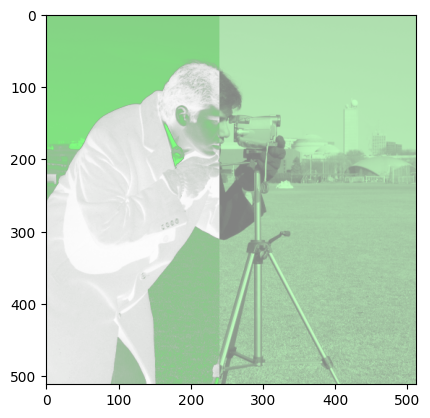

In [40]:
# Solution.

# Convert the image to `float64`.
camera_as_float = ski.util.img_as_float(camera)

# Create a 4-D stack. Halve the values in the Red and Blue channels.
# Duplicate the 2-D image to get the alpha channel.
camera_4D = np.stack([camera_as_float * 0.5,
                      camera_as_float,
                      camera_as_float * 0.5,
                      camera_as_float],
                      axis=2)

# Set roughly half of the pixels to have a uniform transparency value.
camera_4D[:, 240:512, 3] = 0.5

# Show the result.
show_attributes(camera_4D)
plt.imshow(camera_4D);

Now, if you tried to do the `float64` conversion using the `numpy` `.astype()` method, things will seem OK at first:

In [41]:
# DO NOT DO THIS!
camera_as_float_error = camera.astype(float)
show_attributes(camera_as_float_error)

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (512, 512)
Max Pixel Value: 255.0
Min Pixel Value: 0.0


BUT the original `camera` image is `dtype` `unit8`, with a maximum array value of 255. You can see the maximum value of 255.0 in the printout from the cell above.

This maximum value violates the conventions, in `skimage` and `matplotlib` for `float64` images. We can again `np.stack()` and manipulate this mutant array, without error at first... 

In [42]:
camera_4D_error = np.stack([camera_as_float_error * 0.5,
                            camera_as_float_error,
                            camera_as_float_error * 0.5,
                            camera_as_float_error],
                            axis=2)
camera_4D_error[:, 240:512, 3] = 0.5
show_attributes(camera_4D_error)

Type: <class 'numpy.ndarray'>
dtype: float64
Shape: (512, 512, 4)
Max Pixel Value: 255.0
Min Pixel Value: 0.0


...until we try to display it with Matplotlib:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


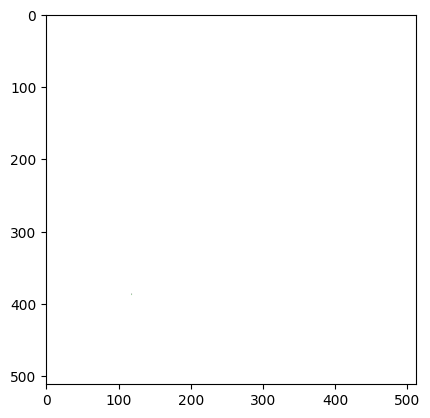

In [43]:
plt.imshow(camera_4D_error);

Matplotlib complains that the maximum values (255.0) violate the required 0 to 1 range of `float64` images. It tries to clip the data to the valid range, but with horrible visual results.

Always use `skimage` conversion functions, to ensure the proper pixel intensity range for the current `dtype`, to avoid these sorts of errors...

::: {solution-end}
:::

# Not all 3-D images are in colour: other image representations

It is important to note that not all 3-D images contain colour information. What sort of images might these be? Typically, they are images obtained during [medical imaging](https://en.wikipedia.org/wiki/Medical_imaging) scans, like brain imaging. The "slices" in the third dimension are now literally slices of a 3-D object (like a brain, chest, arm or leg!) rather than colour channels. 

To show this, below we use `ski.io.imread()` to load in an image in this format. The image is an X-ray of the head of a desert [iguana](https://github.com/neurolabusc/niivue-images/tree/main).

*Note:* here we are loading in a `.png` image, this is a highly atypical format to store medical images, but we use it just for illustration of a 3-D image that does not contain colour, using a familiar image format... The original image file, in the more standard [Nifti format](https://brainder.org/2012/09/23/the-nifti-file-format), is [here](https://github.com/neurolabusc/niivue-images/blob/main/Iguana.nii.gz).

In [44]:
# Read in the `iguana` image, show its attributes.
iguana = ski.io.imread("images/brainy.png")
show_attributes(iguana)

Type: <class 'numpy.ndarray'>
dtype: uint8
Shape: (210, 256, 179)
Max Pixel Value: 229
Min Pixel Value: 0


We can see now that there are 179 slices in the third dimension - however, we do not have 179 colour channels! Each "slice" is a different literal "slice" of the iguana's head. Below, we "walk" through the slices, showing those early in the stack (`iguana[:, :, 10]`) as well as those in the middle (`iguana[:, :, 84]`) and at the end (`iguana[:, :, 178]`):

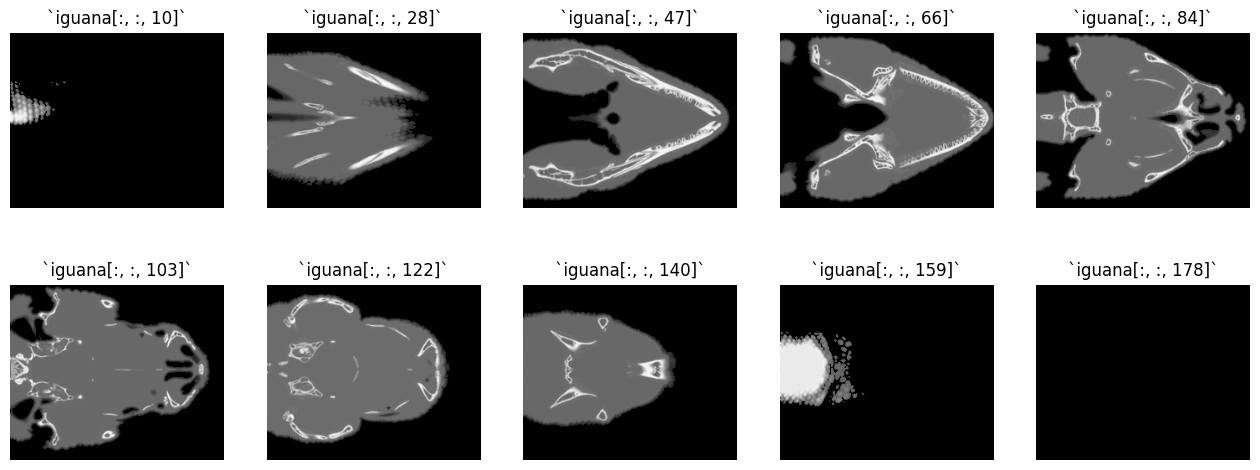

In [45]:
# Show multiple slices of the iguana's head...
plt.figure(figsize=(16, 6))
for count, i in enumerate(np.linspace(10, iguana.shape[2]-1, num=10, dtype=int)):
    plt.subplot(2, 5, count+1)
    plt.imshow(iguana[:, :, i])
    plt.title(f"`iguana[:, :, {i}]`")
    plt.axis('off')

You can see that we are walking through the iguana's head, in the vertical direction.

Becuase this image file contains information about a literal 3-D object (e.g. an iguana's head), we can refer to it as a *volumetric* image. In such images, the third dimension contains *spatial information*, and not *colour information*.

Both `skimage` and `matplotlib` know the slices in the third dimension are not colour channels becuase there are many too many slices to function as colour channels, so it is asssumed that the image is volumetric.

# Summary

On this page we have seen that:

- `skimage` represents images as NumPy arrays. 

* Most `skimage` functions take NumPy arrays as arguments.

- The `ski.io` module handles input and output (e.g. reading and saving image files).

- `skimage` supports multiple `dtypes` in image arrays, and contains convenience functions for converting between `dtypes`.

- `skimage` supports multiple colourspaces which use different colour representations to the default RGB colourspace.

- `skimage` supports both three-channel colour image arrays with shape `(n, m, 3)` and four-channel colour image arrays with shape `(n, m, 4)`, where an extra channel codes for transparency/opacity.

- Some 3-D images are volumetric, and do not contain colour channels, despite having a third dimension.

On the [next page](3_skimage_processing_from_numpy_and_scipy) we will look at how image processing can be performed using NumPy, SciPy and Scikit-image.

# References

Based on: https://lectures.scientific-python.org/packages/scikit-image/index.html

Based on: https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/

Based on: https://jni.github.io/i2k-skimage-napari/lectures/1_image_filters.html